## recall & precision

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

In [2]:
digits = load_digits()

X = digits.data
y = digits.target
y = y.copy()
y[digits.target==9] = 1
y[digits.target!=9] = 0
y

array([0, 0, 0, ..., 0, 1, 0])

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [4]:
from sklearn.linear_model import LogisticRegression

In [5]:
log_reg = LogisticRegression(max_iter=1500).fit(X_train, y_train)
y_predict = log_reg.predict(X_test)
log_reg.score(X_test, y_test)

0.9644444444444444

In [6]:
def TN(y_true, y_predict):
    assert len(y_true) == len(y_predict)
    return np.sum((y_true == 0) & (y_predict == 0))

def FP(y_true, y_predict):
    assert len(y_true) == len(y_predict)
    return np.sum((y_true == 0) & (y_predict == 1))

def TP(y_true, y_predict):
    assert len(y_true) == len(y_predict)
    return np.sum((y_true == 1) & (y_predict == 1))

def FN(y_true, y_predict):
    assert len(y_true) == len(y_predict)
    return np.sum((y_true == 1) & (y_predict == 0))

In [7]:
tn = TN(y_test, y_predict)
tn

394

In [8]:
tp = TP(y_test, y_predict)
tp

40

In [9]:
fp = FP(y_test, y_predict)
fp

9

In [10]:
fn = FN(y_test, y_predict)
fn

7

In [11]:
def recall(y_true, y_predict):
    tp = TP(y_test, y_predict)
    tn = TN(y_test, y_predict)
    return tp / (tp + fn)

def precision(y_true, y_predict):
    tp = TP(y_test, y_predict)
    fp = FP(y_test, y_predict)
    try:
        return tp / (tp + fp)
    except:
        return 0.0

In [12]:
def confusion_matrix(y_true, y_predict):
    return np.array([
        [TN(y_true, y_predict), FP(y_true, y_predict)],
        [FN(y_true, y_predict), TP(y_true, y_predict)]
    ])

In [13]:
confusion_matrix(y_test, y_predict)

array([[394,   9],
       [  7,  40]])

In [14]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

In [15]:
confusion_matrix(y_test, y_predict)

array([[394,   9],
       [  7,  40]], dtype=int64)

In [16]:
recall_score(y_test, y_predict)

0.851063829787234

In [17]:
precision_score(y_test, y_predict)

0.8163265306122449

## F1 Score

In [18]:
def f1_score(precision, recall):
    try:
        return 2 * precision * recall / (precision + recall)
    except:
        return 0.0

In [19]:
recall, precision = 0.3, 0.9
f1_score(precision, recall)

0.45000000000000007

In [20]:
y[digits.target==9] = 1
y[digits.target!=9] = 0

In [21]:
logic = LogisticRegression(max_iter=1500).fit(X_train, y_train)
logic.score(X_test, y_test)

0.9644444444444444

In [22]:
y_predict = logic.predict(X_test)
confusion_matrix(y_test, y_predict)

array([[394,   9],
       [  7,  40]], dtype=int64)

In [23]:
from sklearn.metrics import f1_score

In [25]:
f1_score(y_test, y_predict)

0.8333333333333334

## 决策边界

In [27]:
logic.decision_function(X_test)

array([-29.30189561, -14.34044733,  10.49541619, -28.87373652,
       -31.36533629, -22.76555589, -23.48802744, -25.19591555,
       -24.16088473,  -2.31325563,  20.50476594, -12.42142791,
       -34.74945673, -20.75298394, -18.70465592, -29.67809086,
       -39.64067481,  -5.19051211, -40.6975768 , -22.21892653,
       -60.48585151, -13.43969387, -15.83348358, -18.04104098,
       -19.87479807,   8.07466371, -17.381808  ,  -3.79092527,
       -18.42090643, -47.20400688, -44.52317966, -18.46147966,
       -38.01624073, -24.93950724,  -0.83222842, -17.76610419,
        13.68420807, -30.86735972, -53.35728859, -27.9774358 ,
         3.35238292, -20.0864043 , -63.58468579, -25.02683244,
       -10.82997658, -12.14577363, -29.57031196, -19.62067475,
       -20.70271656, -21.40560702,  13.59619194, -28.58261008,
       -31.2447104 , -31.05558555, -46.61891696, -17.64002064,
       -14.89144682, -12.33252896, -22.40914151, -16.04262664,
       -14.49336914, -38.19160875, -71.25045767, -19.27

In [29]:
np.min(logic.decision_function(X_test))

-77.83776619853978

In [30]:
np.max(logic.decision_function(X_test))

27.430651603446254

In [33]:
y_predict2 = np.array(logic.decision_function(X_test) >= 5, dtype='int')

In [34]:
confusion_matrix(y_test, y_predict2)

array([[401,   2],
       [ 15,  32]], dtype=int64)

In [35]:
precision_score(y_test, y_predict2)

0.9411764705882353

In [37]:
recall_score(y_test, y_predict2)

0.6808510638297872

In [38]:
f1_score(y_test, y_predict2)

0.7901234567901235

In [39]:
y_predict3 = np.array(logic.decision_function(X_test) >= -5, dtype='int')

In [40]:
confusion_matrix(y_test, y_predict3)

array([[377,  26],
       [  1,  46]], dtype=int64)

In [41]:
precision_score(y_test, y_predict3)

0.6388888888888888

In [42]:
recall_score(y_test, y_predict3)

0.9787234042553191

In [43]:
f1_score(y_test, y_predict3)

0.773109243697479

## Precision-Recall 曲线

In [44]:
from sklearn.metrics import precision_recall_curve

In [46]:
precisions, recalls, thresholds = precision_recall_curve(y_test, logic.decision_function(X_test))

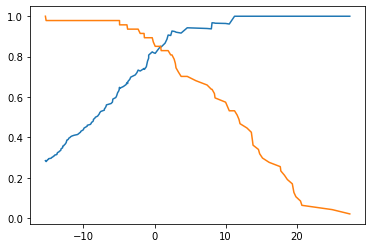

In [47]:
plt.plot(thresholds, precisions[:-1])
plt.plot(thresholds, recalls[:-1])

## ROC & AUC

### TPR & FPR

In [57]:
from sklearn.metrics import roc_curve

In [58]:
from sklearn.metrics import roc_auc_score

In [59]:
fprs, tprs, thresholds = roc_curve(y_test, logic.decision_function(X_test))

In [65]:
roc_auc = roc_auc_score(y_test, logic.decision_function(X_test))
roc_auc

0.9867483237421466

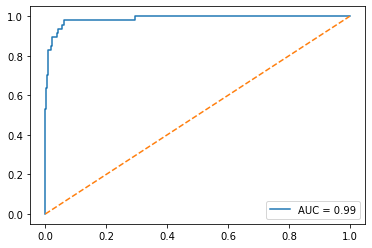

In [70]:
plt.plot(fprs, tprs, label='AUC = %0.2f'% roc_auc)
plt.plot([0,1],[0,1],'--')
plt.legend(loc='lower right')
plt.show()

## 多分类问题的Metrics

In [71]:
digits = load_digits()

X = digits.data
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [74]:
log_reg = LogisticRegression(max_iter=10000).fit(X_train, y_train)
y_predict = log_reg.predict(X_test)
log_reg.score(X_test, y_test)

0.9511111111111111

In [75]:
y_predict = log_reg.predict(X_test)

In [79]:
matrix = confusion_matrix(y_test, y_predict)

array([[46,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 50,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 40,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 45,  0,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0, 46,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  1,  0, 46,  0,  0,  0,  3],
       [ 0,  0,  0,  0,  0,  1, 34,  0,  1,  0],
       [ 0,  1,  0,  0,  1,  0,  0, 43,  0,  1],
       [ 1,  4,  1,  0,  0,  1,  0,  0, 35,  1],
       [ 0,  0,  0,  2,  0,  0,  0,  0,  1, 43]], dtype=int64)

In [ ]:
plt.matshow()